In [31]:
import sys
sys.path.append("../../module")
from nxrd.Compound import Compound
from classes import MCS_Finder
import kcf.converter as kcfco
from rdkit import Chem

In [2]:
f = MCS_Finder("Streptomyces")

In [3]:
html = f.get_html(f.genus)

In [4]:
print(html)

<Response [200]>


In [5]:
Cnumber = f.get_Cnumber(html)

finish getting Cnumber


In [6]:
print(Cnumber)

['C00000108', 'C00000109', 'C00000112', 'C00000114', 'C00000146', 'C00000334', 'C00000336', 'C00000339', 'C00000340', 'C00000368', 'C00000369', 'C00000370', 'C00000371', 'C00000372', 'C00000373', 'C00000374', 'C00000375', 'C00000376', 'C00000377', 'C00000379', 'C00000380', 'C00000381', 'C00000382', 'C00000383', 'C00000384', 'C00000385', 'C00000486', 'C00000730', 'C00000733', 'C00000734', 'C00000740', 'C00000744', 'C00000747', 'C00000748', 'C00000750', 'C00000752', 'C00000753', 'C00000778', 'C00000779', 'C00000780', 'C00000782', 'C00000783', 'C00000785', 'C00000787', 'C00000788', 'C00000789', 'C00000790', 'C00000791', 'C00000793', 'C00000794', 'C00000795', 'C00000796', 'C00000797', 'C00000798', 'C00000799', 'C00000800', 'C00000801', 'C00000846', 'C00000905', 'C00000906', 'C00000907', 'C00000908', 'C00000910', 'C00000911', 'C00000912', 'C00000913', 'C00000914', 'C00000916', 'C00000919', 'C00000926', 'C00001131', 'C00001152', 'C00001203', 'C00001354', 'C00001507', 'C00001775', 'C00002035'

In [7]:
print(len(Cnumber))

1896


In [ ]:
with open("Streptomyces/kcfs.kcfs", "r")as f:
    text = f.read()
    kcf = text.split("///\n")
    molblock = kcfco.kcf_to_molblock(kcf[0])

1 SUBSTR


ValueError: invalid literal for int() with base 10: 'C8x'

In [8]:
Cnlist = []
for i in range(1, 52):
    page = str(i)
    with open("../../../database/knapsack-kcf/KNApSAck" + page + ".kcf")as f:
        clist = f.read().split()
        Cnlist.append(clist[1])
print(Cnlist)

['C00000001', 'C00001119', 'C00002144', 'C00003163', 'C00004172', 'C00005175', 'C00006180', 'C00007188', 'C00008214', 'C00009218', 'C00010225', 'C00011238', 'C00012247', 'C00013252', 'C00014261', 'C00015266', 'C00016267', 'C00017271', 'C00018274', 'C00019276', 'C00020285', 'C00021288', 'C00022289', 'C00023292', 'C00024299', 'C00025305', 'C00026310', 'C00027314', 'C00028321', 'C00029327', 'C00030330', 'C00031343', 'C00032344', 'C00033345', 'C00034347', 'C00035347', 'C00036350', 'C00037352', 'C00038354', 'C00039356', 'C00040358', 'C00041361', 'C00042362', 'C00043363', 'C00044366', 'C00045369', 'C00046369', 'C00047370', 'C00048371', 'C00049371', 'C00050371']


In [9]:
len(Cnlist)

51

In [10]:
int(Cnumber[0][1:])

108

In [15]:
complist = []
for i in Cnumber:
    complist.append(Compound())
print(complist)

[<nxrd.Compound.Compound object at 0x112a7c5f8>, <nxrd.Compound.Compound object at 0x112a7c668>, <nxrd.Compound.Compound object at 0x112a7c6d8>, <nxrd.Compound.Compound object at 0x112a7c7f0>, <nxrd.Compound.Compound object at 0x112a7c5c0>, <nxrd.Compound.Compound object at 0x112a7c748>, <nxrd.Compound.Compound object at 0x112a7c7b8>, <nxrd.Compound.Compound object at 0x112a7c828>, <nxrd.Compound.Compound object at 0x112a7c898>, <nxrd.Compound.Compound object at 0x112a7c978>, <nxrd.Compound.Compound object at 0x112a7c9e8>, <nxrd.Compound.Compound object at 0x112a7ca58>, <nxrd.Compound.Compound object at 0x112a7cac8>, <nxrd.Compound.Compound object at 0x112a7cb70>, <nxrd.Compound.Compound object at 0x112a7cba8>, <nxrd.Compound.Compound object at 0x112a7cc88>, <nxrd.Compound.Compound object at 0x112a7ccf8>, <nxrd.Compound.Compound object at 0x112a7cdd8>, <nxrd.Compound.Compound object at 0x112a7ce48>, <nxrd.Compound.Compound object at 0x112a7ceb8>, <nxrd.Compound.Compound object at 0x112

In [16]:
print(len(complist))

1896


In [20]:
for z, i in enumerate(Cnumber):
    num = int(i[1:])
    for p, k in enumerate(Cnlist[1:]):
        k2 = int(k[1:])
        if k2 > num:
            k3 = str(p+1)
            with open("../../../database/knapsack-kcf/KNApSAck" + k3 + ".kcf")as f:
                Clist = f.read().split("///\n")
                try:
                    for C in Clist:
                        if i == C.split()[1]:
                            molblock = kcfco.kcf_to_molblock(C)
                            # print("OK", i)
                            print(molblock[1])
                            complist[z].input_molblock(molblock[1])
                            break
                except IndexError:
                    print("DAME", i)
            break
    break

C00000108
  ReNxPy

 13 14  0  0  1  0  0  0  0  0999 V2000
   -2.1405    0.4125    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.1405   -0.4125    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4260   -0.8250    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7116   -0.4125    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7116    0.4125    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4260    0.8250    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7116    0.3919    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7116   -0.4331    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0383   -0.7838    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    1.4260    0.8044    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.1405   -0.0206    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.1405    0.8044    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.4260   -0.4331    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0     0  0
  2  3  

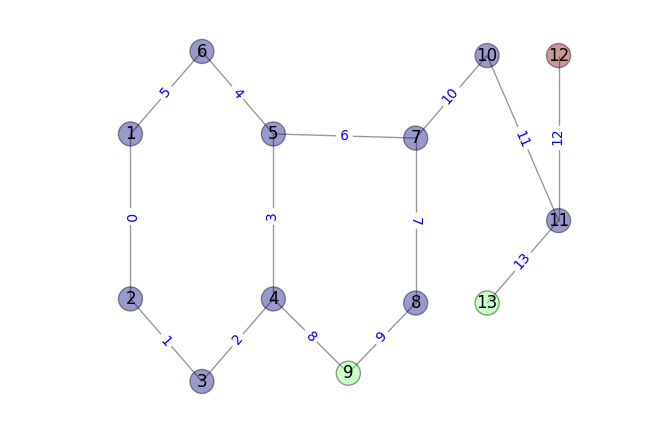

In [21]:
%matplotlib inline
complist[0].draw_cpd_with_labels()

In [55]:
counter = 0
for z, i in enumerate(Cnumber):
    num = int(i[1:])
    for p, k in enumerate(Cnlist[1:]):
        k2 = int(k[1:])
        if k2 > num:
            k3 = str(p+1)
            with open("../../../database/knapsack-kcf/KNApSAck" + k3 + ".kcf")as f:
                Clist = f.read().split("///\n")
                try:
                    for C in Clist:
                        if i == C.split()[1]:
                            molblock = kcfco.kcf_to_molblock(C)
                            # print("OK", i)
                            # print(molblock[1])
                            mol = Chem.MolFromMolBlock(molblock[1])
                            if mol is None:
                                print("None", i, z, k3)
                                if "#+" in C or "#-" in C:
                                    print("Charge in\n")
                                counter += 1
                                break
                            complist[z].input_rdkmol(mol)
                            if "#+" in C or "#-" in C:
                                print(i, z, k3, "Charge in\n")
                            break
                except IndexError:
                    counter += 1
                    print("DAME", i, z)
            break
print(counter)

None C00015064 154 15
Charge in

None C00015065 155 15
Charge in

None C00015066 156 15
Charge in

None C00015067 157 15
Charge in

None C00015960 328 16
Charge in

None C00015961 329 16
Charge in

None C00016132 382 16
Charge in

None C00016531 504 17
Charge in

None C00016631 541 17
Charge in

None C00016632 542 17
Charge in

None C00016633 543 17
Charge in

None C00016634 544 17
Charge in

None C00016635 545 17
Charge in

None C00016636 546 17
Charge in

None C00016839 631 17
Charge in

None C00016845 636 17
Charge in

None C00016911 669 17
Charge in

None C00017630 857 18
Charge in

None C00017655 870 18
Charge in

None C00017656 871 18
Charge in

None C00017657 872 18
Charge in

None C00017866 1012 18
Charge in

None C00017871 1015 18
Charge in

None C00017907 1030 18
Charge in

None C00018072 1135 18
Charge in

None C00018108 1162 18
Charge in

None C00018186 1204 18
Charge in

None C00018187 1205 18
Charge in

None C00018376 1308 19
Charge in

None C00018377 1309 19
Charge in

N

In [52]:
print("sdf" in "lkjsdflkj")

True


In [44]:
#print(Chem.MolFromMolBlock(molblock[1]))
print(molblock[1])
#print(C)

C00015064
  ReNxPy

 61 63  0  0  1  0  0  0  0  0999 V2000
   -2.2595    0.0630    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -2.2595   -0.8068    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5062   -1.2417    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7530   -0.8068    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7530    1.0411    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5062    0.4979    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0128    0.4979    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.7661    0.0630    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.7661   -0.8068    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0128   -1.2417    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.5194    0.4979    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.2726    0.0630    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -6.0259    0.4979    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -6.7792    0.0630    0.0000

In [ ]:
veclist = [0] * len(Cnumber)

In [64]:
import time
import gc
start = time.time()
for i in range(len(Cnumber)):
    if veclist[i] == 0:
        veclist[i] = kcfco.kcf_vec(complist[i])
        print(i, time.time() - start)
        gc.collect()
        break
print("finish")

0 2.6928000450134277
1 5.21219801902771
2 7.332129955291748
3 9.821953058242798
4 12.465757131576538
5 13.880678176879883
6 15.33384108543396
7 47.161192178726196
8 66.6875569820404
9 69.27288007736206
10 72.51417303085327
11 75.76081204414368
12 79.3938820362091
13 83.02112412452698
14 87.02071595191956
15 90.99333214759827
16 94.68677496910095
17 97.48326897621155
18 100.66928505897522
19 139.59984803199768
20 176.71274495124817
21 211.70291304588318
22 252.60029697418213
23 291.3754770755768
24 333.3830940723419


KeyboardInterrupt: 

In [38]:
print(veclist[0].pandas())

                                                   str      type  \
0                                                C-C-C   triplet   
1                                             C8-C8-C8   triplet   
2                                                    C      atom   
3                                                  C-C      bond   
4                                                C-C-N   triplet   
5                                              C-C-C-C    linear   
6                                                   C8      atom   
7                                                C8-C8      bond   
8                                          C8x-C8y-C8y   triplet   
9                                            C-C-C-C-C    linear   
10                                            C8-C8-N4   triplet   
11                                         C-C-C-C,3-C      unit   
12                                         C8-C8-C8-C8    linear   
13                                              

In [28]:
print(complist[0].mol)

None


In [57]:
import resource

In [63]:
rsrc = resource.RLIMIT_AS
soft, hard = resource.getrlimit(rsrc)
print(soft, hard)

9223372036854775807 9223372036854775807


In [62]:
gc.collect()

0

In [67]:
sys.getsizeof(complist[2])

56

In [69]:
%%prun
start = time.time()
for i in range(len(Cnumber)):
    if veclist[i] == 0:
        veclist[i] = kcfco.kcf_vec(complist[i])
        print(i, time.time() - start)
        gc.collect()
        break
print("finish")

25 83.45089602470398
finish
 

時間がかかりすぎるので全部やるのは難しそう？  
多分メモリが足りなくなる。

ベクトル作って結果だけ全部辞書に突っ込んだらいけそう？

10-13の奴は全部に共通な奴だけを抜き出している。  
数が多めのやつを抜き出せばそれっぽい単位が見つかるのではないか？

かかる時間の予想は4時間ほど

現状持っているか持っていないかでしか判断していないが2個以上持っていた場合にダブルカウントする必要があると思う。

In [70]:
%%timeit
veclist[0] = kcfco.kcf_vec(complist[0])

1 loop, best of 3: 2.67 s per loop


1loopってなんだよ

In [71]:
sys.getsizeof(complist)

16560

In [72]:
sys.getsizeof(veclist)

15232

参照の向こう側まではサイズを計算してくれないっぽい？